# RESNet 응용

In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions

In [ ]:
res50 = ResNet50()
res50.summary()

In [3]:
from tensorflow.keras.applications.resnet import ResNet101
res101 = ResNet101()

179658752/179648224 [==============================] - 2s 0us/step


In [9]:
import numpy as np
from PIL import Image
from google.colab import files
up = files.upload()

Saving puppy.jpg to puppy.jpg


In [10]:
IMAGE_SIZE = 224

def center_image(img): 
    h, w, _ = np.array(img).shape
    if h > w:
        width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
    else:
        width, height = (w * IMAGE_SIZE) // h, IMAGE_SIZE
    
    new_img = np.array(img.resize((width, height)))
    
    diff = abs(width - height) // 2
    if width > height: 
        final_img = new_img[:, diff:diff+IMAGE_SIZE, :] 
    else:
        final_img = new_img[diff:diff+IMAGE_SIZE,:,:]
    
    return final_img

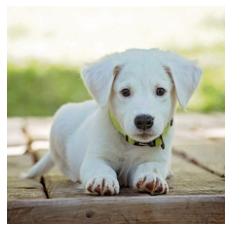

In [11]:
import matplotlib.pyplot as plt

img = Image.open('puppy.jpg')
img2 = center_image(img)
plt.imshow(img2), plt.axis('off');

- 이미지 예측

In [12]:
yhat = res50.predict(np.array(img2).reshape(-1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02099601', 'golden_retriever', 0.6317783),
   ('n02099712', 'Labrador_retriever', 0.26829892),
   ('n02104029', 'kuvasz', 0.03299411),
   ('n04409515', 'tennis_ball', 0.012093174),
   ('n03223299', 'doormat', 0.0064191218)]])

In [13]:
label[0][0][1], label[0][0][2]

('Egyptian_cat', 0.58085394)

In [13]:
yhat = res101.predict(np.array(img2).reshape(-1,224,224,3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('Labrador_retriever', 0.9528138)

- 이미지를 224 x 224 사이즈로 자르기 

In [18]:
img = Image.open('cat3.jfif')
h, w, c = np.array(img).shape
h, w

(182, 277)

In [20]:
if h > w:
    width, height = 224, (h * 224) // w
else:
    width, height = (w * 224) // h, 224
height, width

(224, 340)

In [22]:
new_img = np.array(img.resize((width, height)))
new_img.shape

(224, 340, 3)

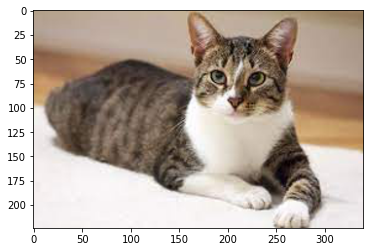

In [23]:
plt.imshow(new_img);

In [24]:
diff = abs(width - height) // 2
if width > height: 
    final_img = new_img[:, diff:diff+224, :] 
else:
    final_img = new_img[diff:diff+224,:,:]
final_img.shape

(224, 224, 3)

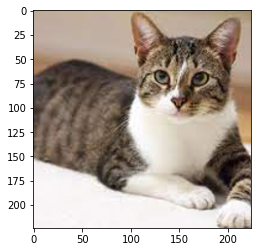

In [25]:
plt.imshow(final_img);

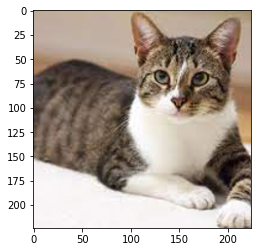

In [27]:
img = Image.open('cat3.jfif')
img2 = center_image(img)
plt.imshow(img2);

In [28]:
yhat = vgg16.predict(np.array(img2).reshape(-1,224,224,3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('tabby', 0.5744169)

In [30]:
yhat = vgg16.predict(np.array(img2).reshape(-1,224,224,3))
label = decode_predictions(yhat)

AttributeError: ignored